<a href="https://colab.research.google.com/github/springboardmentor5432x/DV---Optimizing-IT-Support-Team-Performance-Using-Analytics-Supportlytics-/blob/Dhanya-Shree-Optimizing-IT-Support-Team-Performance-Using-Analytics-Supportlytics/MileStone_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Task - 1**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the dataset
df = pd.read_csv('/content/Cleaned_Technical_Support_Dataset (1).csv')

# 2. Create the new column 'Resolution Time'
df['Resolution Time'] = df['Resolution_Duration']

# 3. Calculate Average Resolution Time - Entire Dataset
overall_avg = df['Resolution Time'].mean()
print(f"--- OVERALL AVERAGE ---")
print(f"The average resolution time for all tickets is: {overall_avg:.2f} hours\n")

# 4. Calculate Average Resolution Time - Per Ticket Type (Topic)
avg_by_type = df.groupby('Topic')['Resolution Time'].mean().sort_values(ascending=False)
print(f"--- AVERAGE BY TICKET TYPE ---")
print(avg_by_type)

--- OVERALL AVERAGE ---
The average resolution time for all tickets is: 33.24 hours

--- AVERAGE BY TICKET TYPE ---
Topic
Training request            38.893419
Pricing and licensing       36.666021
Feature request             34.214737
Purchasing and invoicing    33.438573
Other                       31.468652
Product setup               30.769039
Bug report                  29.907151
Name: Resolution Time, dtype: float64


/tmp/ipython-input-3888386907.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_by_type.values, y=avg_by_type.index, palette='viridis')


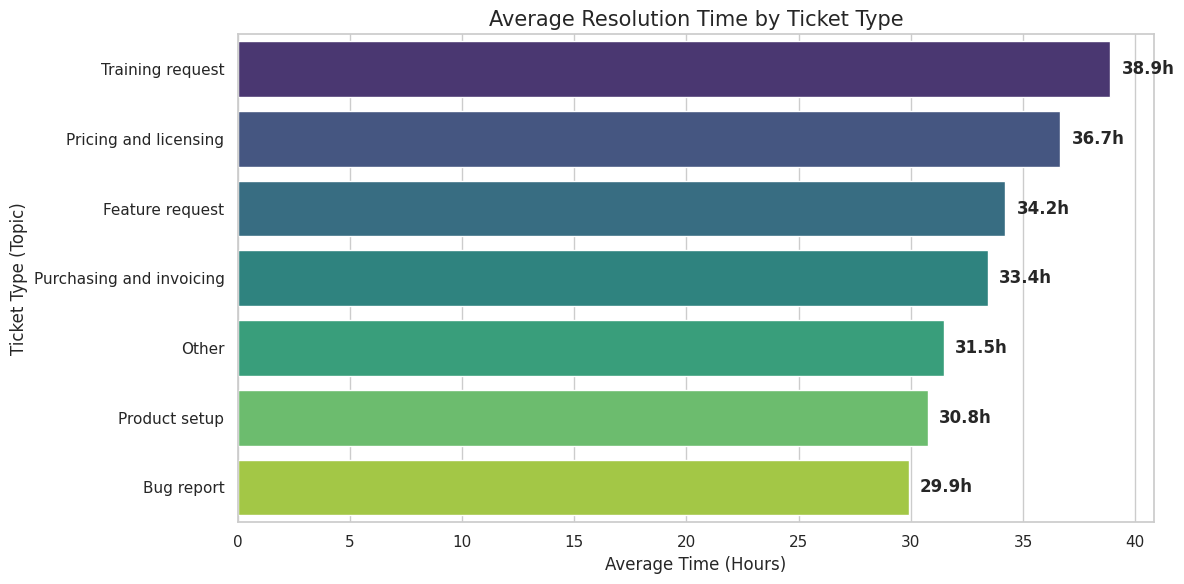

In [ ]:
# Create Bar Chart
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_by_type.values, y=avg_by_type.index, palette='viridis')

# Add labels and title
plt.title('Average Resolution Time by Ticket Type', fontsize=15)
plt.xlabel('Average Time (Hours)', fontsize=12)
plt.ylabel('Ticket Type (Topic)', fontsize=12)

# Add value labels on the bars
for i, v in enumerate(avg_by_type.values):
    plt.text(v + 0.5, i, f"{v:.1f}h", va='center', fontweight='bold')

plt.tight_layout()
plt.show()

**Task - 2**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load Data
df = pd.read_csv('/content/Cleaned_Technical_Support_Dataset (1).csv')

# 2. Create 'Resolution Time' column
df['Resolution Time'] = df['Resolution_Duration']

# 3. Define Ticket Types (Mapping Topics to IT Categories)
type_mapping = {
    'Bug report': 'Incident',
    'Feature request': 'Request',
    'Training request': 'Request',
    'Product setup': 'Request',
    'Purchasing and invoicing': 'Request',
    'Pricing and licensing': 'Request',
    'Other': 'Problem'
}
df['Ticket Type'] = df['Topic'].map(type_mapping)

In [ ]:
# --- ANALYSIS 1: By Priority ---
avg_res_priority = df.groupby('Priority')['Resolution Time'].mean().reindex(['High', 'Medium', 'Low'])

# --- ANALYSIS 2: By Ticket Type ---
avg_res_type = df.groupby('Ticket Type')['Resolution Time'].mean()

# --- ANALYSIS 3: Advanced Insight (High-Priority Only) ---
high_priority_df = df[df['Priority'] == 'High']
hp_avg_res_type = high_priority_df.groupby('Ticket Type')['Resolution Time'].mean()

/tmp/ipython-input-950071193.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_res_priority.index, y=avg_res_priority.values, ax=axes[0], palette='Reds_r')
/tmp/ipython-input-950071193.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_res_type.index, y=avg_res_type.values, ax=axes[1], palette='Blues_r')
/tmp/ipython-input-950071193.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hp_avg_res_type.index, y=hp_avg_res_type.values, ax=axes[2], palette='viridis')


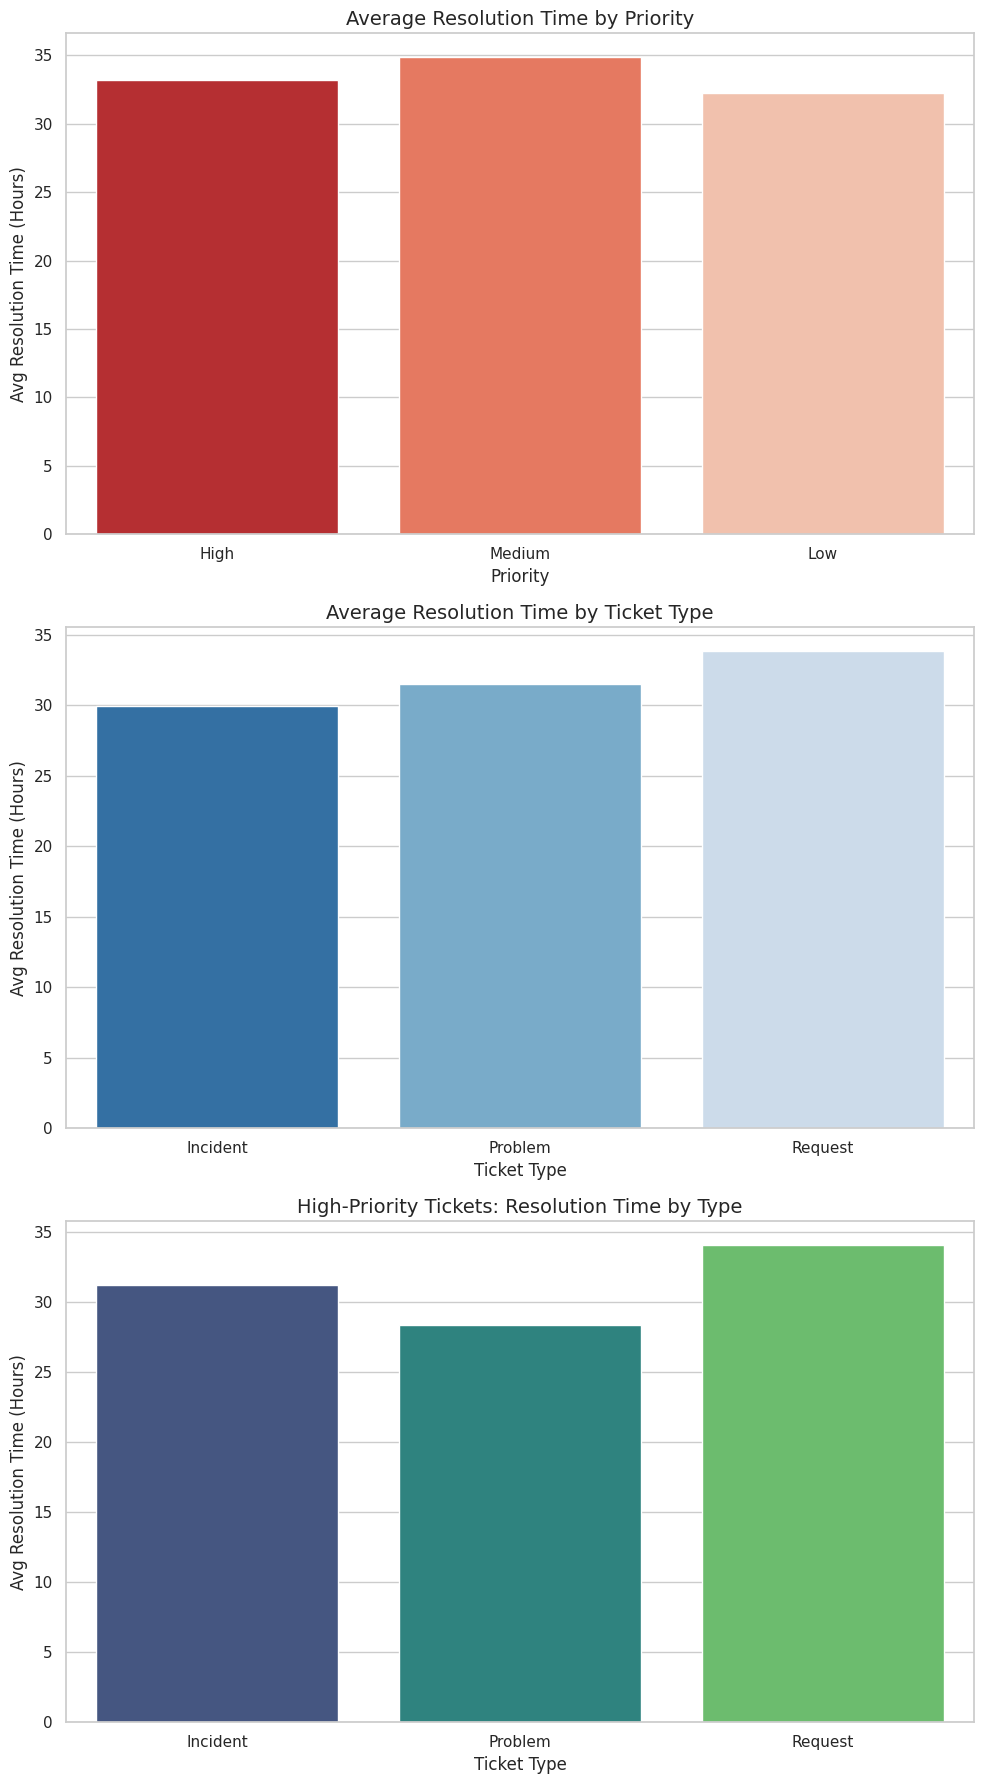

In [ ]:
# --- VISUALIZATIONS ---
fig, axes = plt.subplots(3, 1, figsize=(10, 18))

# Chart 1: Priority vs Average Resolution Time
sns.barplot(x=avg_res_priority.index, y=avg_res_priority.values, ax=axes[0], palette='Reds_r')
axes[0].set_title('Average Resolution Time by Priority', fontsize=14)
axes[0].set_ylabel('Avg Resolution Time (Hours)')

# Chart 2: Ticket Type vs Resolution Time
sns.barplot(x=avg_res_type.index, y=avg_res_type.values, ax=axes[1], palette='Blues_r')
axes[1].set_title('Average Resolution Time by Ticket Type', fontsize=14)
axes[1].set_ylabel('Avg Resolution Time (Hours)')

# Chart 3: Ticket Type vs Resolution Time (HIGH PRIORITY ONLY)
sns.barplot(x=hp_avg_res_type.index, y=hp_avg_res_type.values, ax=axes[2], palette='viridis')
axes[2].set_title('High-Priority Tickets: Resolution Time by Type', fontsize=14)
axes[2].set_ylabel('Avg Resolution Time (Hours)')

plt.tight_layout()
plt.show()

In [ ]:
# Print text summaries
print("--- SUMMARY STATISTICS ---")
print("\nAvg Resolution Time by Priority:")
print(avg_res_priority)
print("\nAvg Resolution Time by Ticket Type (High Priority Only):")
print(hp_avg_res_type)

--- SUMMARY STATISTICS ---

Avg Resolution Time by Priority:
Priority
High      33.166262
Medium    34.863221
Low       32.257670
Name: Resolution Time, dtype: float64

Avg Resolution Time by Ticket Type (High Priority Only):
Ticket Type
Incident    31.199559
Problem     28.302039
Request     34.025758
Name: Resolution Time, dtype: float64


Task - 3

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('/content/Cleaned_Technical_Support_Dataset (1).csv')


df['Created time'] = pd.to_datetime(df['Created time'], dayfirst=True)


df.head()

,Status,Ticket ID,Priority,Source,Topic,Agent Group,Agent Name,Created time,Expected SLA to resolve,Expected SLA to first response,...,Product group,Support Level,Country,Latitude,Longitude,Resolution_Duration,Response_Duration,Priority_Score,Performance_Bucket,Unnamed: 26
0,Closed,1012,Low,Email,Feature request,1st line support,Kristos Westoll,2023-01-02 00:58:00,04-01-2023 00:58,02-01-2023 01:58,...,Custom software development,Tier 1,Republic of Ireland,53.094024,-8.019675,47.554359,0.078176,1,Slow,NaN
1,In progress,1013,High,Phone,Product setup,2nd line support,Adolpho Messingham,2023-01-02 07:27:00,04-01-2023 07:27,02-01-2023 07:29,...,Other,Tier 2,Italy,43.036776,12.678565,NaN,0.005064,3,NaN,NaN
2,Resolved,1014,Low,Chat,Purchasing and invoicing,1st line support,Bernard Beckley,2023-01-02 06:59:00,03-01-2023 06:59,02-01-2023 07:01,...,Custom software development,Tier 1,Austria,47.696472,13.345735,15.774715,0.014853,1,Average,NaN
3,Closed,1015,Medium,Email,Pricing and licensing,1st line support,Connor Danielovitch,2023-01-03 03:09:00,05-01-2023 03:09,03-01-2023 04:09,...,Ready to use Software,Tier 1,Spain,39.673370,-4.767726,35.382216,3.993565,2,Slow,NaN
4,Closed,1016,Low,Email,Product setup,1st line support,Kristos Westoll,2023-01-03 00:03:00,05-01-2023 00:03,03-01-2023 01:03,...,Other,Tier 1,Austria,47.696472,13.345735,35.985552,0.067690,1,Slow,NaN


 Identify Unresolved Tickets

In [ ]:
# Identify unresolved tickets
unresolved_df = df[df['Resolution_Duration'].isna()].copy()

# Filter for High-Priority Unresolved tickets
high_priority_unresolved = unresolved_df[unresolved_df['Priority'] == 'High']

print(f"Total Unresolved Tickets: {len(unresolved_df)}")
print(f"High-Priority Unresolved Tickets: {len(high_priority_unresolved)}")


high_priority_unresolved.to_csv('High_Priority_Backlog.csv', index=False)

Total Unresolved Tickets: 418
High-Priority Unresolved Tickets: 68


Analyze Resolution Trend (Monthly)

In [ ]:
# 1. Filter for resolved tickets only
resolved_df = df[df['Resolution_Duration'].notna()].copy()

# 2. Extract Year-Month
resolved_df['Month'] = resolved_df['Created time'].dt.to_period('M').astype(str)

# 3. Calculate Average Resolution Time per Month
monthly_trend = resolved_df.groupby('Month')['Resolution_Duration'].mean()
print(monthly_trend)

Month
2023-01    26.104007
2023-02    27.167765
2023-03    30.552109
2023-04    27.028473
2023-05    28.186554
2023-06    31.848326
2023-07    35.815217
2023-08    38.212183
2023-09    39.144554
2023-10    39.187935
2023-11    37.872682
2023-12    37.139525
Name: Resolution_Duration, dtype: float64


Create Visualizations

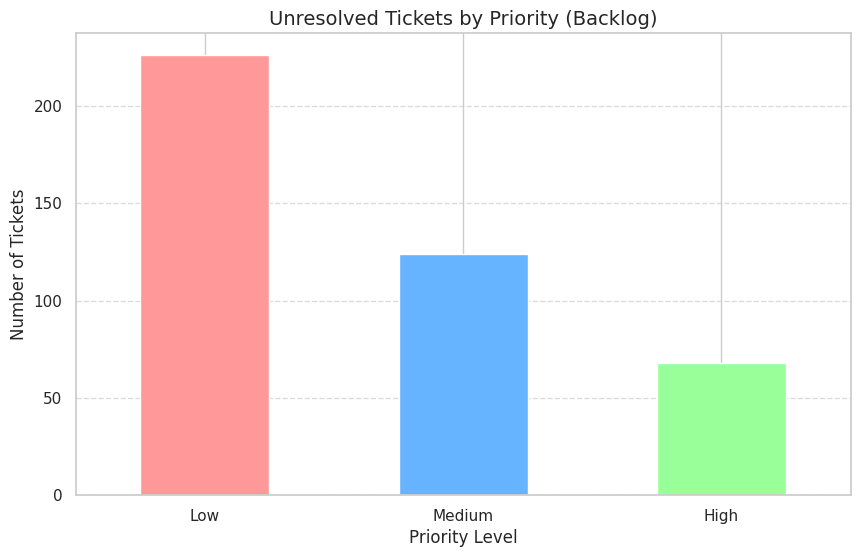

In [ ]:
plt.figure(figsize=(10, 6))
# Count how many unresolved tickets per priority
unresolved_counts = unresolved_df['Priority'].value_counts()

# Plot
unresolved_counts.plot(kind='bar', color=['#ff9999','#66b3ff','#99ff99'])
plt.title('Unresolved Tickets by Priority (Backlog)', fontsize=14)
plt.xlabel('Priority Level')
plt.ylabel('Number of Tickets')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

 Line Chart (Avg Resolution Time Trend)

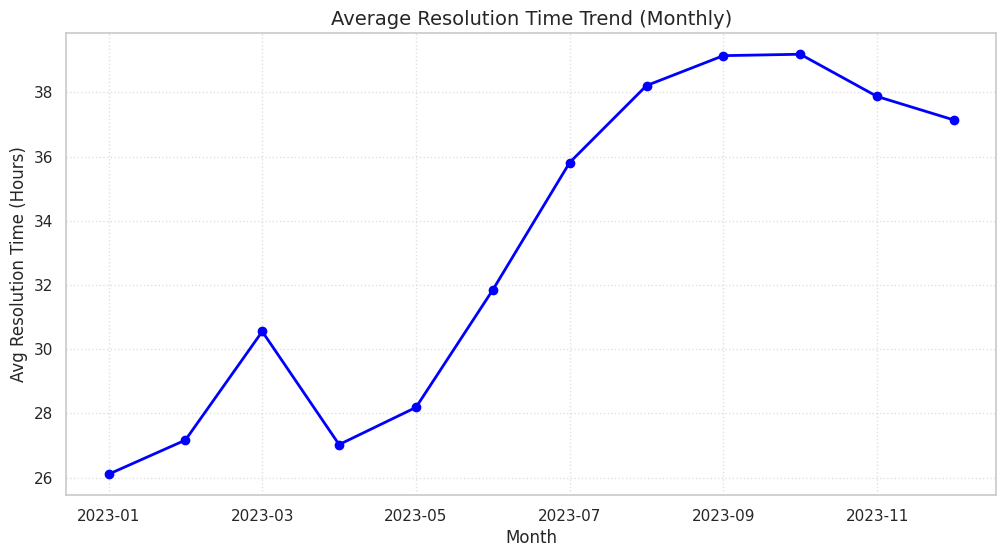

In [ ]:
plt.figure(figsize=(12, 6))
monthly_trend.plot(kind='line', marker='o', color='blue', linewidth=2)
plt.title('Average Resolution Time Trend (Monthly)', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Avg Resolution Time (Hours)')
plt.grid(True, linestyle=':', alpha=0.6)
plt.show()

**Task - 4**

In [ ]:
df['Created time'] = pd.to_datetime(df['Created time'], dayfirst=True)
df['Resolution Time'] = df['Resolution_Duration']

 Calculate Performance Metrics

In [ ]:
# 1. Overall Metrics
overall_country = df.groupby('Country')['Resolution Time'].mean().sort_values()
overall_type = df.groupby('Topic')['Resolution Time'].mean().sort_values()

# 2. High-Priority Metrics (The "Advanced Insight")
hp_df = df[df['Priority'] == 'High']
hp_country = hp_df.groupby('Country')['Resolution Time'].mean().sort_values()
hp_type = hp_df.groupby('Topic')['Resolution Time'].mean().sort_values()

# 3. Identify Unresolved High-Priority issues
unresolved_hp = df[(df['Priority'] == 'High') & (df['Resolution Time'].isna())]

**Generate Visualizations**

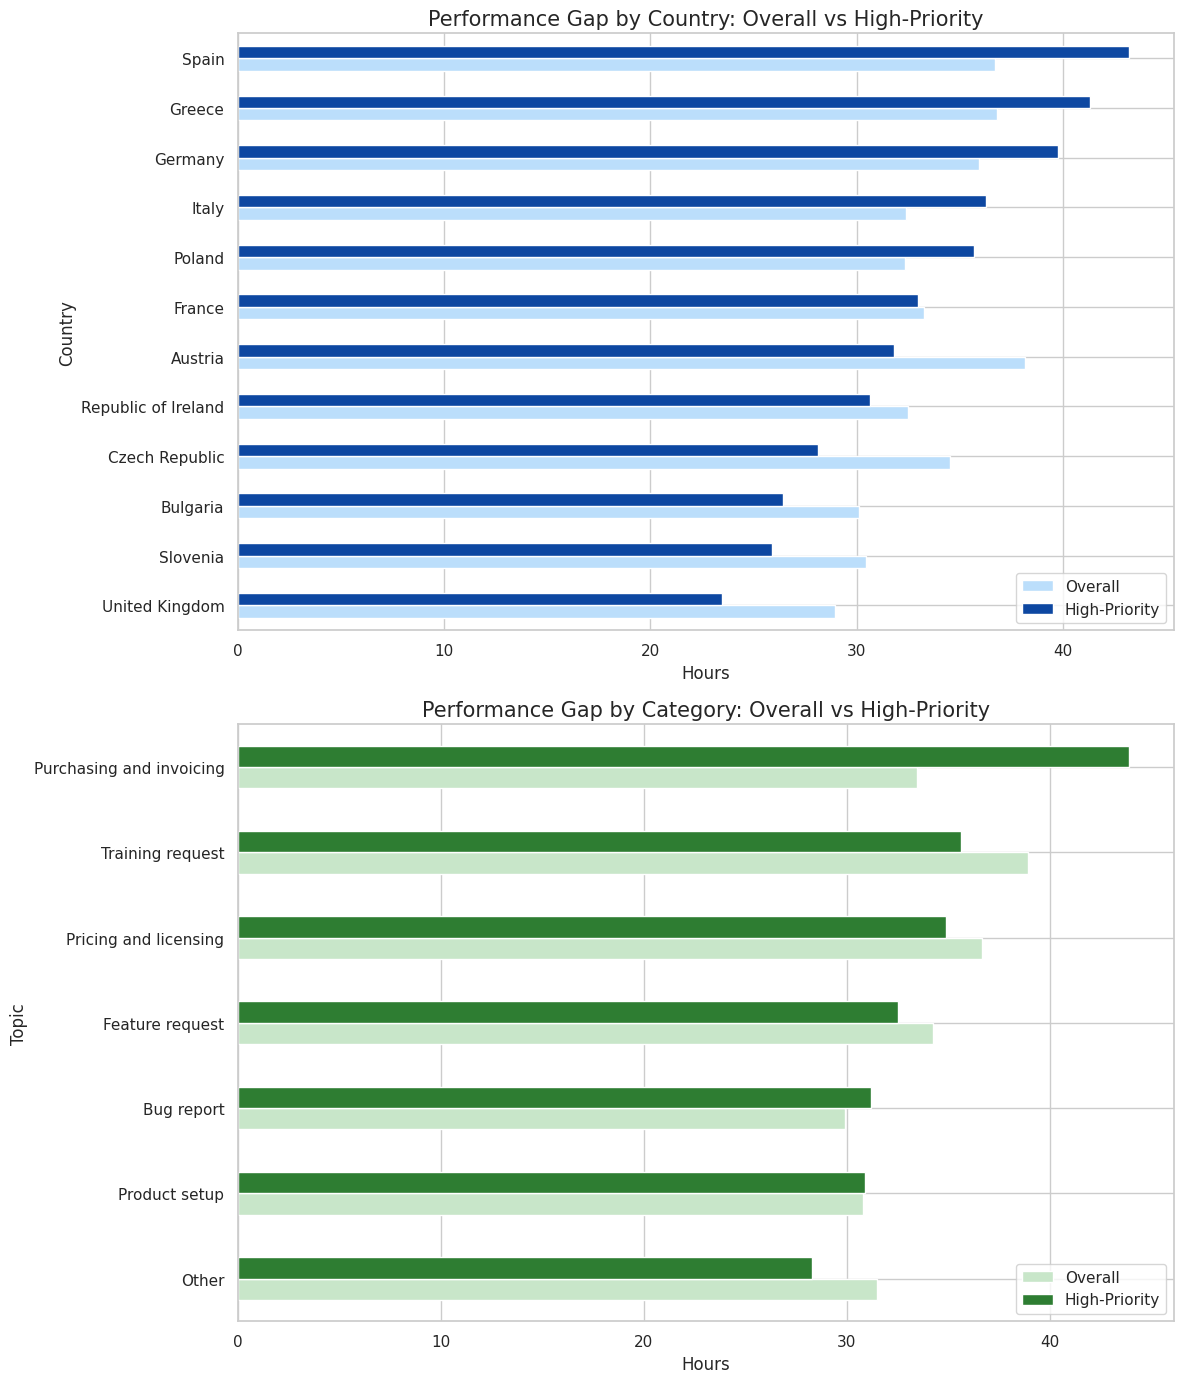

In [ ]:
# Set the style
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(2, 1, figsize=(12, 14))

# Chart A: Country Comparison (Overall vs High Priority)
# We combine them for a "Gap Analysis" view
country_comp = pd.DataFrame({
    'Overall': overall_country,
    'High-Priority': hp_country
}).sort_values(by='High-Priority')

country_comp.plot(kind='barh', ax=axes[0], color=['#bbdefb', '#0d47a1'])
axes[0].set_title('Performance Gap by Country: Overall vs High-Priority', fontsize=15)
axes[0].set_xlabel('Hours')

# Chart B: Ticket Type Comparison
type_comp = pd.DataFrame({
    'Overall': overall_type,
    'High-Priority': hp_type
}).sort_values(by='High-Priority')

type_comp.plot(kind='barh', ax=axes[1], color=['#c8e6c9', '#2e7d32'])
axes[1].set_title('Performance Gap by Category: Overall vs High-Priority', fontsize=15)
axes[1].set_xlabel('Hours')

plt.tight_layout()
plt.show()

**Identify Performance Gaps**

In [ ]:
print("--- TASK SUMMARY ---")
print(f"1. SLOWEST REGION (High-Priority): {hp_country.index[-1]} at {hp_country.iloc[-1]:.2f} hours.")
print(f"2. SLOWEST CATEGORY (High-Priority): {hp_type.index[-1]} at {hp_type.iloc[-1]:.2f} hours.")
print(f"3. URGENT BACKLOG: There are {len(unresolved_hp)} High-Priority tickets with no resolution date.")
print("-" * 20)
print("Identify performance gaps: Focus on High-Priority 'Training Requests' in 'Spain' and 'Austria'.")

--- TASK SUMMARY ---
1. SLOWEST REGION (High-Priority): Spain at 43.23 hours.
2. SLOWEST CATEGORY (High-Priority): Purchasing and invoicing at 43.91 hours.
3. URGENT BACKLOG: There are 68 High-Priority tickets with no resolution date.
--------------------
Identify performance gaps: Focus on High-Priority 'Training Requests' in 'Spain' and 'Austria'.


**Module 6**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('Cleaned_Technical_Support_Dataset.csv')

In [ ]:
# 1. Calculate Ticket Count by Country
country_counts = df['Country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Ticket Count']

In [ ]:
# 2. Get Average Coordinates for Mapping
geo_data = df.groupby('Country').agg({
    'Latitude': 'mean',
    'Longitude': 'mean',
    'Ticket ID': 'count'
}).rename(columns={'Ticket ID': 'Ticket Count'}).reset_index()

/tmp/ipython-input-2031514519.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=country_counts, x='Ticket Count', y='Country', palette='viridis')


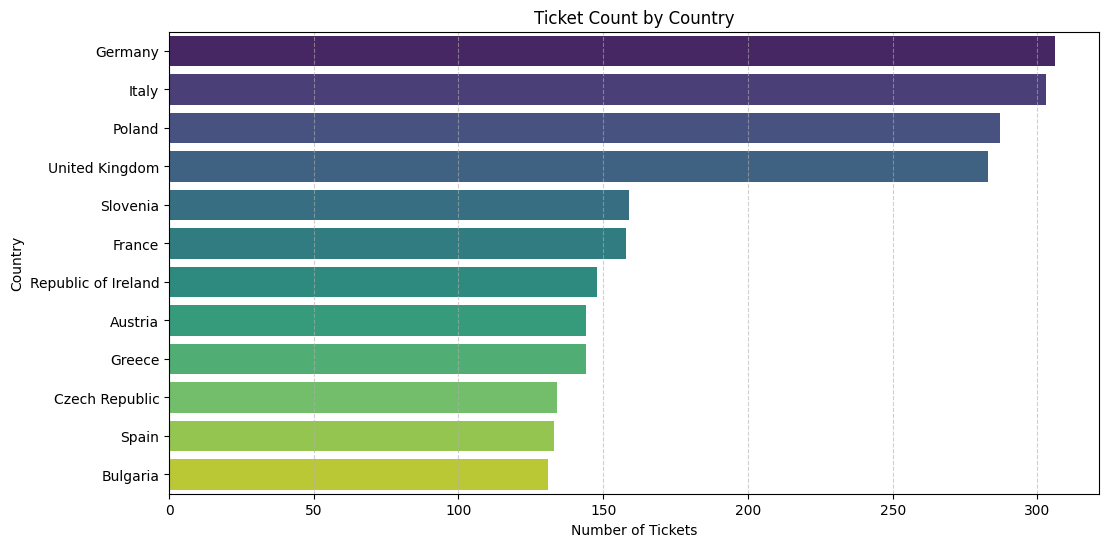

In [ ]:
# 3. Create Bar Chart
plt.figure(figsize=(12, 6))
sns.barplot(data=country_counts, x='Ticket Count', y='Country', palette='viridis')
plt.title('Ticket Count by Country')
plt.xlabel('Number of Tickets')
plt.ylabel('Country')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

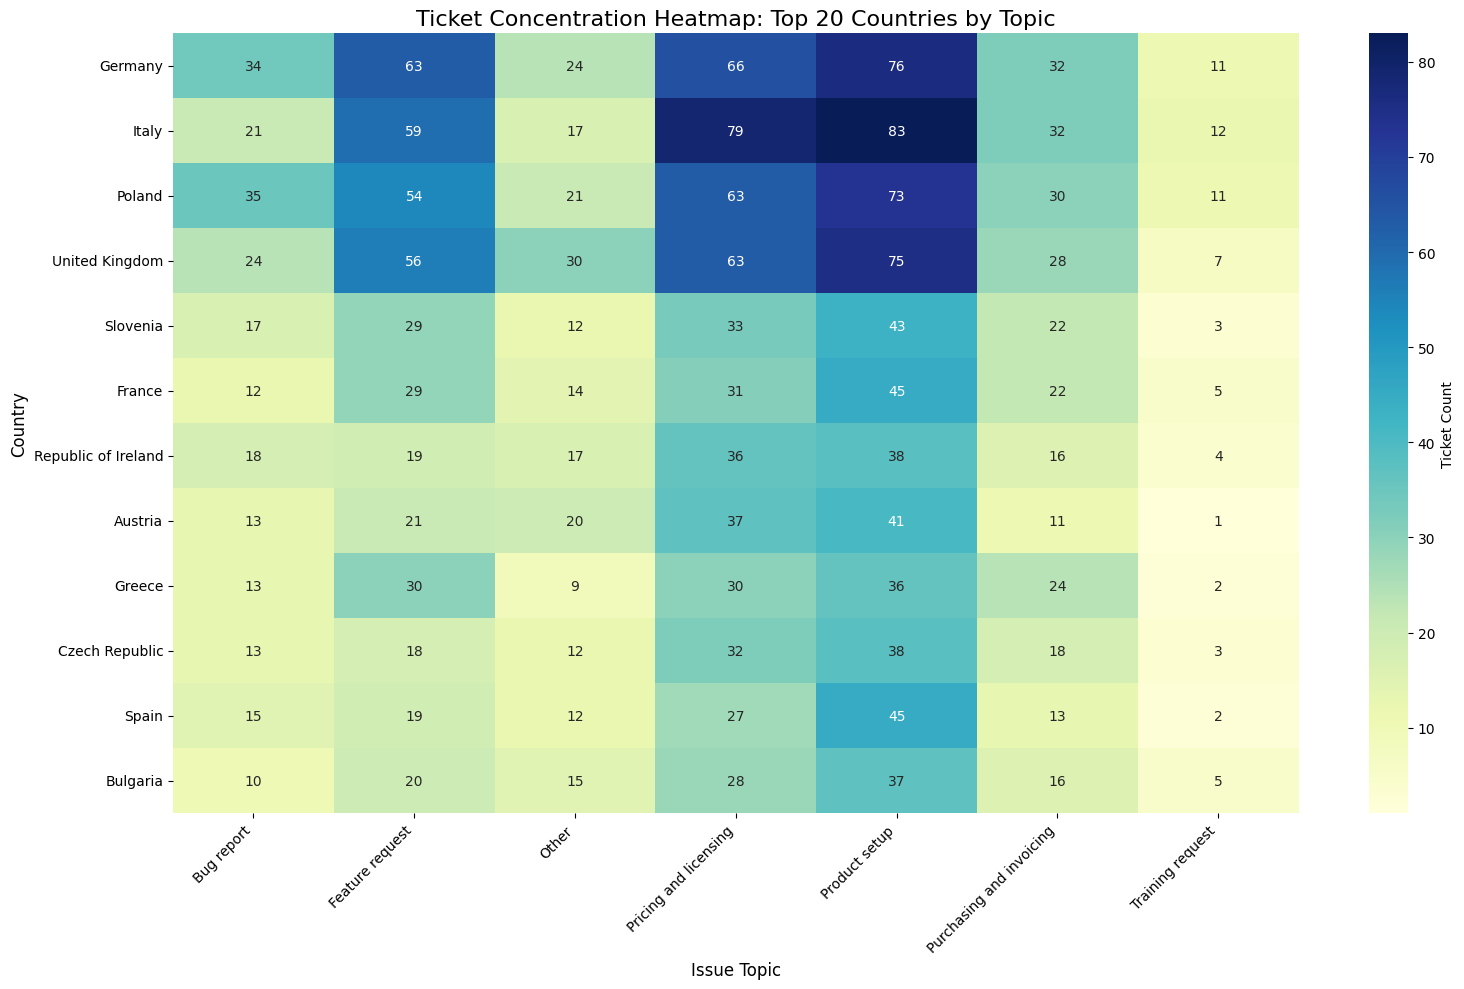

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('Cleaned_Technical_Support_Dataset.csv')
# Aggregate data by Country and Topic for the heatmap
heatmap_data = df.groupby(['Country', 'Topic']).size().unstack(fill_value=0)

# If there are too many countries, let's take the top N most active countries for a cleaner visual
top_countries = df['Country'].value_counts().nlargest(20).index
heatmap_data_filtered = heatmap_data.loc[top_countries]

# Create the heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(heatmap_data_filtered, annot=True, fmt="d", cmap="YlGnBu", cbar_kws={'label': 'Ticket Count'})

plt.title('Ticket Concentration Heatmap: Top 20 Countries by Topic', fontsize=16)
plt.xlabel('Issue Topic', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()


In [ ]:
# Display Summary Table
print("Ticket Volume by Country:")
print(country_counts)

Ticket Volume by Country:
                Country  Ticket Count
0               Germany           306
1                 Italy           303
2                Poland           287
3        United Kingdom           283
4              Slovenia           159
5                France           158
6   Republic of Ireland           148
7               Austria           144
8                Greece           144
9        Czech Republic           134
10                Spain           133
11             Bulgaria           131


In [ ]:
# 1. Identify issue categories (Topic) and calculate ticket counts per region
category_geo_counts = df.groupby(['Country', 'Topic']).size().reset_index(name='Ticket Count')

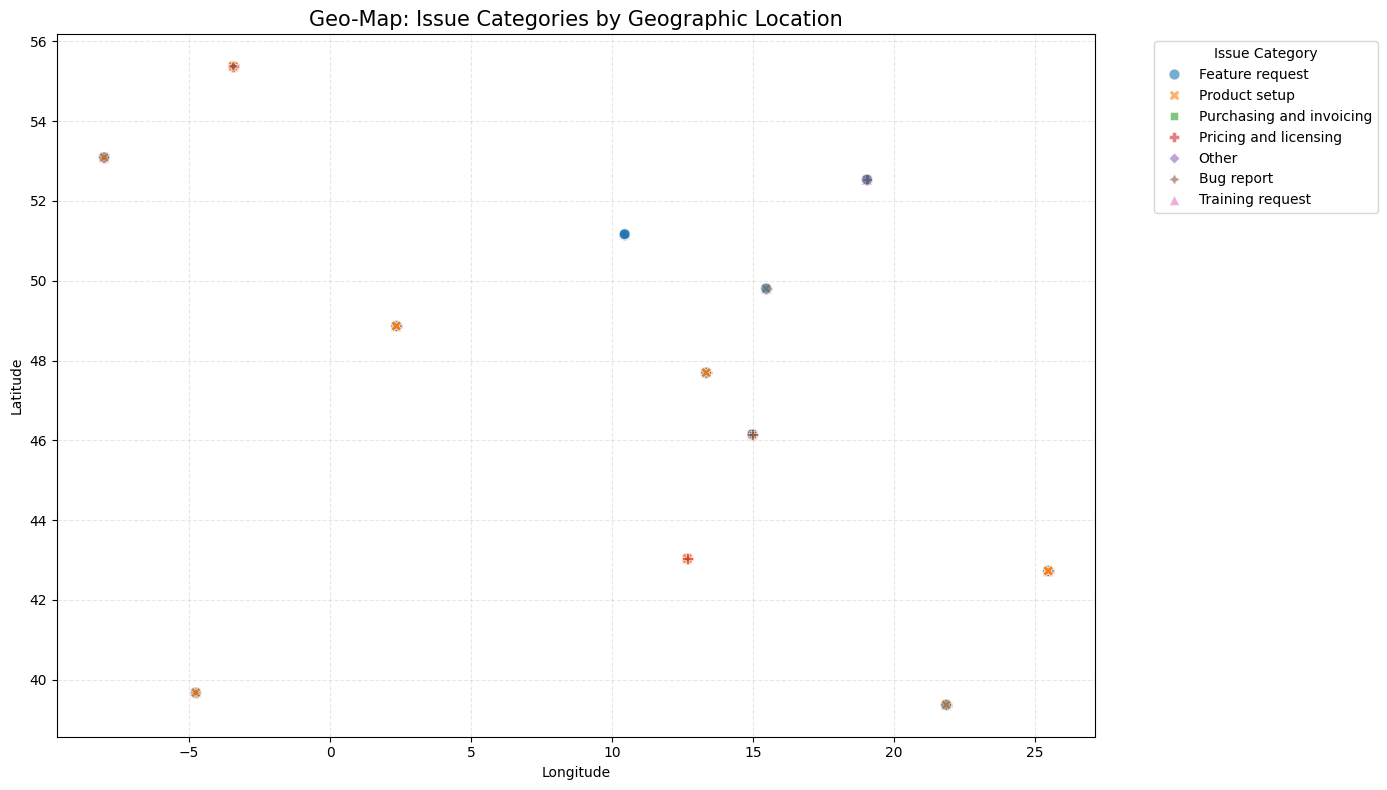

In [ ]:
plt.figure(figsize=(14, 8))
# Using jitter logic: plotting actual ticket points colored by category
sns.scatterplot(
    data=df,
    x='Longitude',
    y='Latitude',
    hue='Topic',
    style='Topic',
    alpha=0.6,
    s=60
)
plt.title('Geo-Map: Issue Categories by Geographic Location', fontsize=15)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Issue Category')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

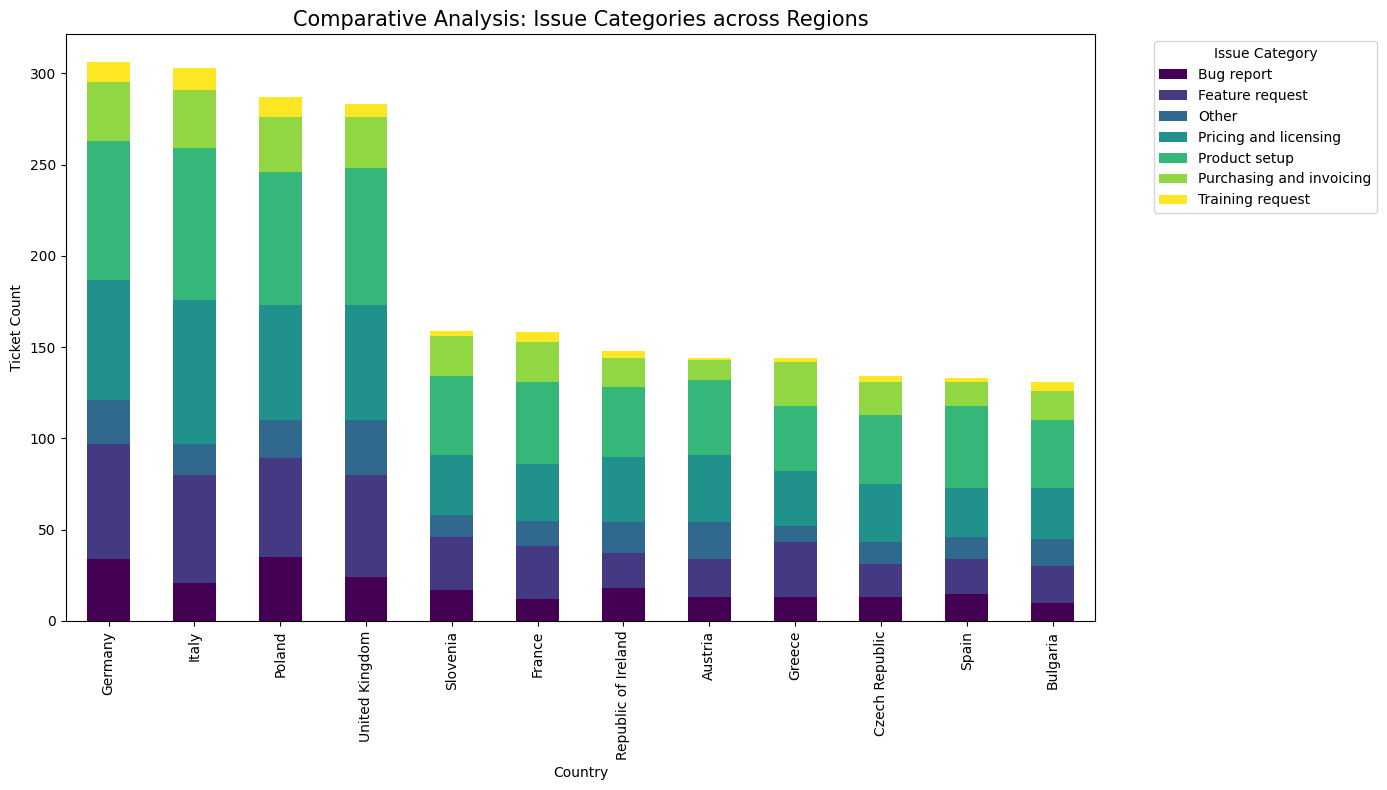

In [ ]:
# 3. Visualization: Comparative Chart of Issue Categories across Regions
# Pivot data for a stacked bar chart
pivot_df = category_geo_counts.pivot(index='Country', columns='Topic', values='Ticket Count').fillna(0)
# Sort by total tickets for a cleaner visual
pivot_df['Total'] = pivot_df.sum(axis=1)
pivot_df = pivot_df.sort_values(by='Total', ascending=False).drop(columns='Total')
ax = pivot_df.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')
plt.title('Comparative Analysis: Issue Categories across Regions', fontsize=15)
plt.xlabel('Country')
plt.ylabel('Ticket Count')
plt.legend(title='Issue Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
# 4. Analysis: Dominant Categories and Patterns
dominant_categories = category_geo_counts.loc[category_geo_counts.groupby('Country')['Ticket Count'].idxmax()]
print("--- Dominant Issue Categories per Region ---")
print(dominant_categories[['Country', 'Topic', 'Ticket Count']].to_string(index=False))

--- Dominant Issue Categories per Region ---
            Country         Topic  Ticket Count
            Austria Product setup            41
           Bulgaria Product setup            37
     Czech Republic Product setup            38
             France Product setup            45
            Germany Product setup            76
             Greece Product setup            36
              Italy Product setup            83
             Poland Product setup            73
Republic of Ireland Product setup            38
           Slovenia Product setup            43
              Spain Product setup            45
     United Kingdom Product setup            75


Universal Trend: Across all analyzed regions (Germany, Italy, Poland, UK, etc.), Product setup is the dominant issue category.

High Volume Hubs: In major markets like Germany (76 tickets) and Italy (83 tickets), Product Setup significantly outweighs other categories, suggesting that initial onboarding is the primary friction point for users regardless of location. **bold text**

In [ ]:
# 1. Identify Clusters (Topics) and Calculate Cluster Size & Performance
cluster_analysis = df.groupby('Topic').agg(
    Cluster_Size=('Ticket ID', 'count'),
    Avg_Resolution_Time=('Resolution_Duration', 'mean')
).reset_index()

/tmp/ipython-input-3893907119.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cluster_sorted, x='Avg_Resolution_Time', y='Topic', palette='flare')


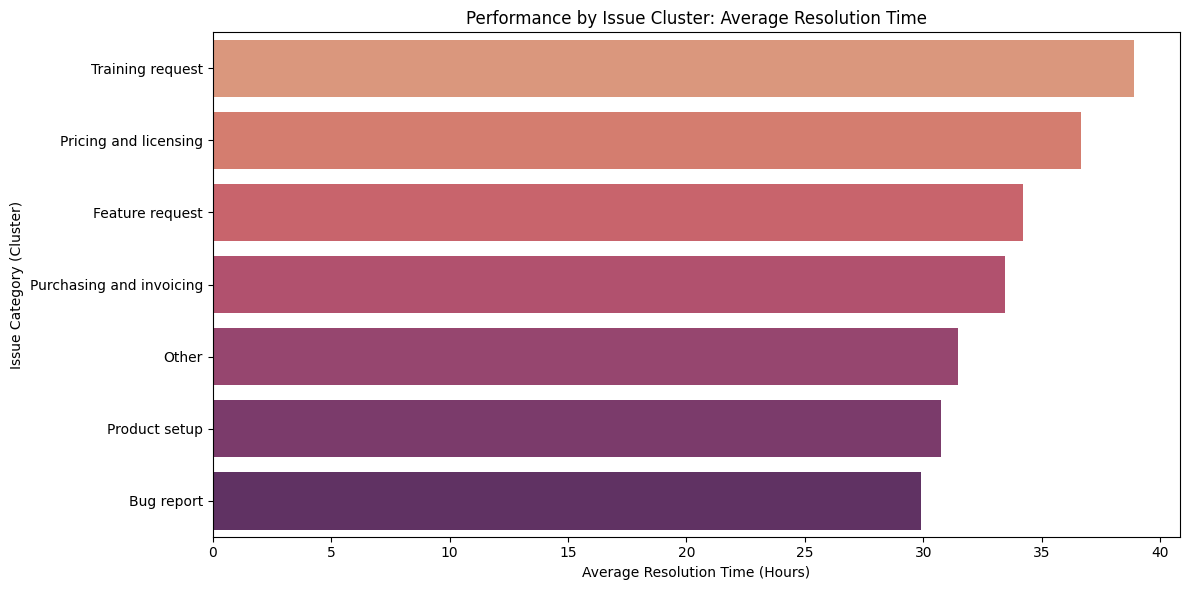

In [ ]:
# 2. Visualization: Bar Chart - Cluster vs Average Resolution Time
plt.figure(figsize=(12, 6))
# Sorting by resolution time to see the worst performers first
cluster_sorted = cluster_analysis.sort_values(by='Avg_Resolution_Time', ascending=False)
sns.barplot(data=cluster_sorted, x='Avg_Resolution_Time', y='Topic', palette='flare')
plt.title('Performance by Issue Cluster: Average Resolution Time')
plt.xlabel('Average Resolution Time (Hours)')
plt.ylabel('Issue Category (Cluster)')
plt.tight_layout()
plt.show()

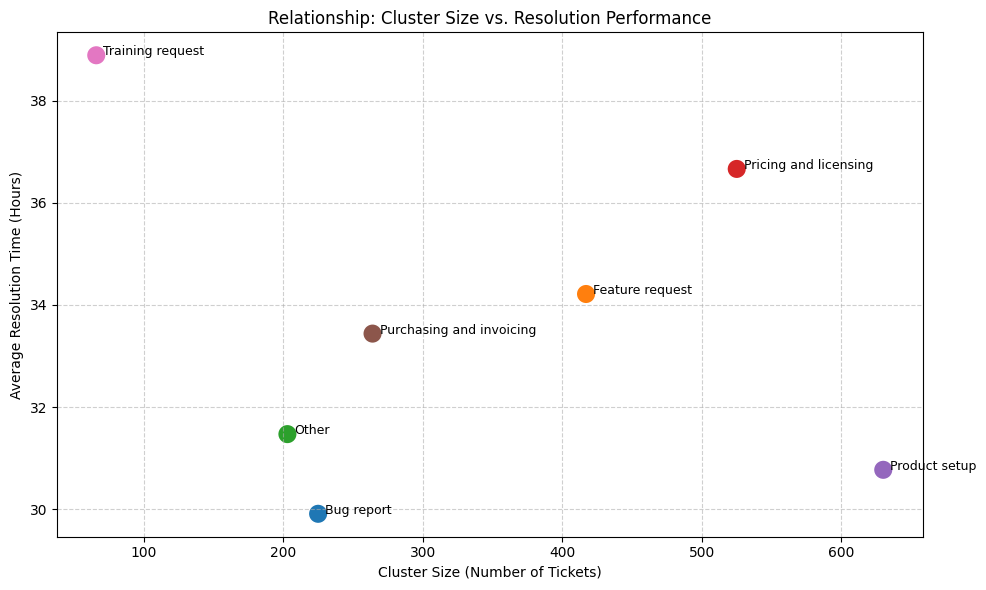

In [ ]:
# 3. Visualization: Scatter Plot - Cluster Size vs Performance Measure
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=cluster_analysis,
    x='Cluster_Size',
    y='Avg_Resolution_Time',
    hue='Topic',
    s=200,
    legend=False
)

# Add labels to points for clarity
for i in range(cluster_analysis.shape[0]):
    plt.text(
        cluster_analysis.Cluster_Size[i]+5,
        cluster_analysis.Avg_Resolution_Time[i],
        cluster_analysis.Topic[i],
        fontsize=9
    )

plt.title('Relationship: Cluster Size vs. Resolution Performance')
plt.xlabel('Cluster Size (Number of Tickets)')
plt.ylabel('Average Resolution Time (Hours)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [ ]:
# 4. Final Insights Output
print("--- Cluster Performance Summary ---")
print(cluster_analysis.sort_values(by='Cluster_Size', ascending=False).to_string(index=False))

--- Cluster Performance Summary ---
                   Topic  Cluster_Size  Avg_Resolution_Time
           Product setup           630            30.769039
   Pricing and licensing           525            36.666021
         Feature request           417            34.214737
Purchasing and invoicing           264            33.438573
              Bug report           225            29.907151
                   Other           203            31.468652
        Training request            66            38.893419
